### 深度学习环境安装

- 硬件：i5-8400 6c 2.80GHz + 16G + GTX1060 6GB
- python: 3.7
- CUDA: cuda_10.0.130_411.31_win10
- cudnn: cudnn-10.0-windows10-x64-v7.6.2.24
- 两个conda环境：pytorch, tensorflow(1.14.0)

参考：[Win10下安装Anaconda+CUDA+TensorFlow+PyTorch+PyCharm](https://zhuanlan.zhihu.com/p/59031211)

### Pytorch的代码流程

参考：

[CNN识别手写数字集MNIST](https://www.jianshu.com/p/48a301f2da7e)

[pytorch神经网络实践(1): 安装与初次使用pytorch搭建神经网络实践手写数字识别教程](https://zhuanlan.zhihu.com/p/76901725)

[PYTORCH DOCUMENTATION](https://pytorch.org/docs/master/)

----

jupyter notebook 进入对于conda环境：conda install nb_conda  在new里面选择对应的环境
([如何在Jupyter Notebook中使用Python虚拟环境？](https://zhuanlan.zhihu.com/p/29564719))

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
# 引入库
import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
# 超参数
batch_size = 64
learning_rate = 0.02
num_eporches = 20

In [3]:
# 1. 加载数据和标签
data_ft = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

train_dataset = datasets.MNIST("./data", train=True, transform=data_ft, download=True)
test_dataset = datasets.MNIST("./data", train=False, transform=data_ft)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

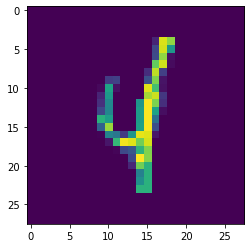

torch.Size([64, 1, 28, 28])
torch.Size([64])
tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
   

In [17]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

plt.imshow(images[0].numpy().squeeze())
plt.show()

print(images.shape)
print(labels.shape)

print(images[0])
print(labels[0])

In [4]:
# 2. 设计网络结构：CNN模型
# 建立四个卷积层网络 、两个池化层 、 1个全连接层
# 第一层网络中，为卷积层，将28*28*1的图片，转换成16*26*26
# 第二层网络中，包含卷积层和池化层。将16*26*26 -> 32*24*24,并且池化成cheng32*12*12
# 第三层网络中，为卷积层，将32*12*12 -> 64*10*10
# 第四层网络中，为卷积层和池化层，将 64*10*10 -> 128*8*8,并且池化成128*4*4
# 第五次网络为全连接网络

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True))
        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = nn.Sequential(
            nn.Linear(128 * 4 * 4, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 10))

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = x.view(x.size(0), -1)  # 第二次卷积的输出拉伸为一行
        x = self.fc(x)
        return x

In [5]:
model = CNN()
if torch.cuda.is_available():
    model = model.cuda()

In [6]:
# 3. 设计损失函数
criterion = nn.CrossEntropyLoss()

In [7]:
# 4. 设置用于自动调节神经网络参数的优化器
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [19]:
# 5. 训练模型
epoch = 0
for data in train_loader:
    img, label = data

    # 与全连接网络不同，卷积网络不需要将所像素矩阵转换成一维矩阵
    # img = img.view(img.size(0), -1)

    if torch.cuda.is_available():
        img = img.cuda()
        label = label.cuda()
    else:
        img = Variable(img)

        label = Variable(label)

    out = model(img)
    
    # 5.1 用所设计算损失(误差)函数计算误差
    loss = criterion(out, label)
    print_loss = loss.data.item()

    # 5.2 每次训练前清零之前计算的梯度(导数)
    optimizer.zero_grad()
    
    # 5.3 根据误差反向传播计算误差对各个权重的导数
    loss.backward()
    
    # 5.4 根据优化器里面的算法自动调整神经网络权重
    optimizer.step()
    
    epoch += 1
    if epoch % 50 == 0:
        print('epoch: {}, loss: {:.4}'.format(epoch, loss.data.item()))
        
# torch.save(model,'./my_handwrite_recognize_model.pt')

epoch: 50, loss: 0.04082
epoch: 100, loss: 0.2933
epoch: 150, loss: 0.08349
epoch: 200, loss: 0.06754
epoch: 250, loss: 0.02098
epoch: 300, loss: 0.0307
epoch: 350, loss: 0.009883
epoch: 400, loss: 0.1279
epoch: 450, loss: 0.0326
epoch: 500, loss: 0.04806
epoch: 550, loss: 0.1472
epoch: 600, loss: 0.009471
epoch: 650, loss: 0.01987
epoch: 700, loss: 0.02328
epoch: 750, loss: 0.01826
epoch: 800, loss: 0.02624
epoch: 850, loss: 0.03966
epoch: 900, loss: 0.02825


In [9]:
# 模型评估
model.eval()
eval_loss = 0
eval_acc = 0
for data in test_loader:
    img, label = data

    # 与全连接网络不同，卷积网络不需要将所像素矩阵转换成一维矩阵
    # img = img.view(img.size(0), -1)

    if torch.cuda.is_available():
        img = img.cuda()
        label = label.cuda()

    out = model(img)
    loss = criterion(out, label)
    eval_loss += loss.data.item() * label.size(0)
    _, pred = torch.max(out, 1)
    num_correct = (pred == label).sum()
    eval_acc += num_correct.item()
    
print('Test Loss: {:.6f}, Acc: {:.6f}'.format(
    eval_loss / (len(test_dataset)),
    eval_acc / (len(test_dataset))
))

Test Loss: 0.057345, Acc: 0.983300


----

In [ ]:
# 1. 加载MNIST手写数字数据集数据和标签
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, ), (0.5, ))])
trainset = datasets.MNIST(root='./data', train=True,
                            download=True, transform=transform)
trainsetloader = torch.utils.data.DataLoader(trainset, batch_size=20000, shuffle=True)

testset = datasets.MNIST(root='./data', train=True,
                            download=True, transform=transform)
testsetloader = torch.utils.data.DataLoader(testset, batch_size=20000, shuffle=True)

#######如果你不放心数据有没有加载出可以将图片显示出来看下#######
# dataiter = iter(trainsetloader)
# images, labels = dataiter.next()
# import numpy as np
# import matplotlib.pyplot as plt
# plt.imshow(images[0].numpy().squeeze())
# plt.show()
# print(images.shape)
# print(labels.shape)
##########上面这段是显示图片的代码#############


# 2. 设计网络结构
first_in, first_out, second_out = 28*28,  128, 10
model = torch.nn.Sequential(
    torch.nn.Linear(first_in, first_out),
    torch.nn.ReLU(),
    torch.nn.Linear(first_out, second_out),
)

# 3. 设计损失函数
loss_fn = torch.nn.CrossEntropyLoss()

# 4. 设置用于自动调节神经网络参数的优化器
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 5. 训练神经网络（重复训练10次）
for t in range(10):
    for i, one_batch in enumerate(trainsetloader,0):
        data,label = one_batch
        data[0].view(1,784)# 将28x28的图片变成784的向量
        data = data.view(data.shape[0],-1)

        # 让神经网络根据现有的参数，根据当前的输入计算一个输出
        model_output = model(data)
        # 5.1 用所设计算损失(误差)函数计算误差
        loss = loss_fn(model_output , label)
        if i%500 == 0:
            print(loss)
        # 5.2 每次训练前清零之前计算的梯度(导数)
        optimizer.zero_grad()
        # 5.3 根据误差反向传播计算误差对各个权重的导数
        loss.backward()
        # 5.4 根据优化器里面的算法自动调整神经网络权重
        optimizer.step()

# 保存下训练好的模型,省得下次再重新训练
torch.save(model,'./my_handwrite_recognize_model.pt')


##########现在你已经训练好了#################
# 6. 用这个神经网络解决你的问题，比如手写数字识别，输入一个图片矩阵，然后模型返回一个数字
testdataiter = iter(testsetloader)
testimages, testlabels = testdataiter.next()

img_vector = testimages[0].squeeze().view(1,-1)
# 模型返回的是一个1x10的矩阵，第几个元素值最大那就是表示模型认为当前图片是数字几
result_digit = model(img_vector)
print("该手写数字图片识别结果为：", result_digit.max(1)[1],"标签为：",testlabels[0])